# Exploratory Data Analysis

In this notebook, I have illuminated some of the strategies that one can use to explore the data and gain some insights about it.

We will start from finding metadata about the data, to determining what techniques to use, to getting some important insights about the data. This is based on the IBM's Data Analysis with Python course on Coursera. 

## The Problem
The problem is to find the variables that impact the car price. For this problem, we will use a real-world dataset that details information about cars.

The dataset used is an open-source dataset made available by Jeffrey C. Schlimmer. The one used in this notebook is hosted on the IBM Cloud. The dataset provides details of some cars. It includes properties like make, horse-power, price, wheel-type and so on. 

## Loading data and finding the metadata


 Import libraries 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline 

Load the data as pandas dataframe


In [2]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### Metadata: The columns's types

Finding column's types is an important step. It serves two purposes:
1. See if we need to convert some data. For example, price may be in string instead of numbers. This is very important as it could throw everything that we do afterwards off.
2. Find out what type of analysis we need to do with what column. After fixing the problems given above, the type of the object is often a great indicator of whether the data is categorical or numerical. This is important as it would determine what kind of exploratory analysis we can and want to do. 

To find out the type, we can simply use `.dtypes` property of the dataframe. Here's an example using the dataframe we loaded above.

In [3]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

From the results above, we can see that we can roughly divide the types into two categories: numeric (int64 and float64) and object. Although object type can contain lots of things, it's used often to store string variables. A quick glance at the table tells us that there's no glaring errors in object types. 

Now we divide them into two categories: numerical variables and categorical variables. Numerical, as the name states, are the variables that hold numerical data. Categorical variables hold string that describes a certain property of the data (such as Audi as the make).

Make a special note that our target variable, price, is numerical. So the relationships we would be exploring would be between numerical-and-numerical data and numerical-and-categorical data. 

## Relationship between Numerical Data

First we will explore the relationship between two numerical data and see if we can learn some insights out of it.

In the beginning, it's helpful to get the correlation between the variables. For this, we can use the `corr()` method to find out the correlation between all the variables. 

Do note that the method finds out the Pearson correlation. Natively, pandas also support Spearman and the Kendall Tau correlation. You can also pass in a custom callable if you want. Check out the docs for more info.

Here's how to do it with the dataframe that we have:

In [4]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


Note that the diagonal elements are always one; because correlation with itself is always one. 

Now, it seems somewhat daunting, and frankly, unneccessary to have this big of a table and correlation between things we don't care (say bore and stroke). If we want to find out the correlation with just price, using `corrwith()` method is helpful. 

Here's how to do it:

In [5]:
corr = df.corrwith(df['price'])

# Prettify
pd.DataFrame(data=corr.values, index=corr.index, columns=['Correlation'])

,Correlation
symboling,-0.082391
normalized-losses,0.133999
wheel-base,0.584642
length,0.690628
width,0.751265
height,0.135486
curb-weight,0.834415
engine-size,0.872335
bore,0.543155
stroke,0.082310


From the table above, we have some idea about what can we expect the relationship should be like. 

As a refresher, in Pearson correlation, values range in [-1, 1] with -1 and 1 implying a perfect linear relationship and 0 implying none. A positive value implies a positive relationship (value increase in response to increment) and negative value implies negative relationship (value decrease in response to increment).

The next step is to have a more visual outlook on the relationship.

### Visualizing Relationships 

Continuous numerical variables are variables that may contain any value within some range. In pandas dtype, continuous numerical variables can have the type "int64" or "float64". 

Scatterplots are a great way to visualize these variables is by using scatterplots.

To take it further, it's better to use a scatter plot with a regression line. This should also be able to provide us with some preliminary ways to test our hypothesis of the relationship between them. 

In this notebook, we would be using the `regplot()` function in the `seaborn` package.

Below are some examples.

<h4>Positive linear relationship</h4>


Let's plot "engine-size" vs "price" since the correlation between them seems strong. 


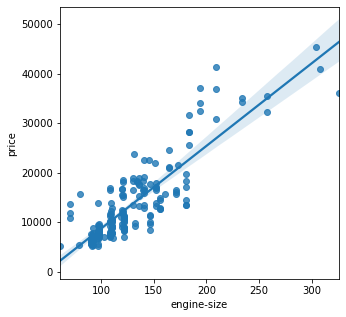

In [6]:
plt.figure(figsize=(5,5))
sns.regplot(x="engine-size", y="price", data=df);

As the engine-size goes up, the price goes up. This indicates a decent positive direct correlation between these two variables. Thus, we can say that the engine size is a good predictor of price since the regression line is almost a perfect diagonal line.

We can also check this with the Pearson correlation we got above. It's 0.87, which means sense. 

Let's also try highway mpg too since the correlation between them is -0.7 

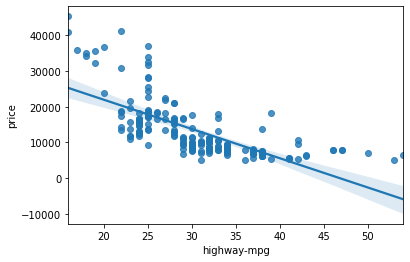

In [7]:
sns.regplot(x="highway-mpg", y="price", data=df);

The graph shows a decent negative realtionship. So, it could be a potential indicator. Although, it seems that the relationship isn't exactly normal--given the curve of the points. 

Let's try a higher order regression line.

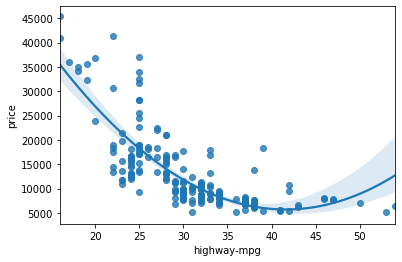

In [8]:
sns.regplot(x="highway-mpg", y="price", data=df, order=2);

There. It seems much better.

### Weak Linear Relationship

Not all variables have to be correlated. Let's check out the graph of "Peak-rpm" as a predictor variable for "price".

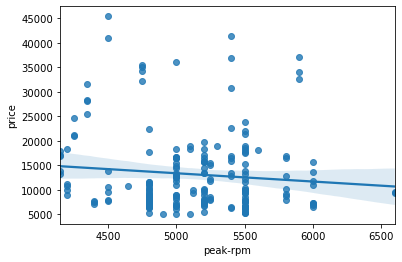

In [9]:
sns.regplot(x="peak-rpm", y="price", data=df);

From the graph, it's clear that peak rpm is a bad indicator of price. It seems that there is no relationship between them. It seems almost random. 

A quick check at the correlation value confirms this. The value is -0.1. It's very close to zero, implying no relationship. 

Although there are cases in which low value can be misguiding, it's usually only for relationships that show a non-linear relationship in which value goes down and up. But the graph confirms there is none.

## Relationship between Numerical and Categorical data

Categorical variables, like their name imply, divide the data into certain categories. They essentially describe a 'characteristic' of the data unit, and are often selected from a small group of categories.

Although they commonly have "object" type, it's possible to have them has "int64" too (for example 'Level of happiness'). 

Boxplots are a great way to visualize such relationships. Boxplots essentially show the spread of the data. You can use the `boxplot()` function in the seaborn package.

Here's an example by plotting relationship between "body-style" and "price"

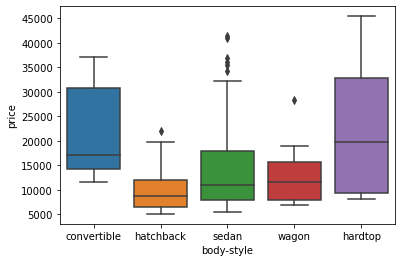

In [10]:
sns.boxplot(x="body-style", y="price", data=df);

We can infer that there is likely to be no significant relationship as there is a decent over lap. 

Let's examine engine "engine-location" and "price"

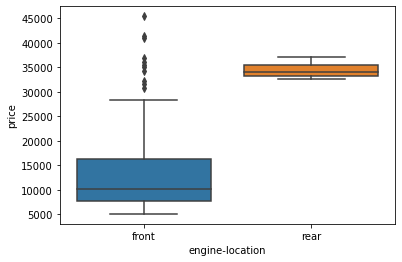

In [11]:
sns.boxplot(x="engine-location", y="price", data=df);

Although there are a lot of outliers for the front, the distribution of price between these two engine-location categories is distinct enough to take engine-location as a potential good predictor of price.

Let's examine "drive-wheels" and "price".

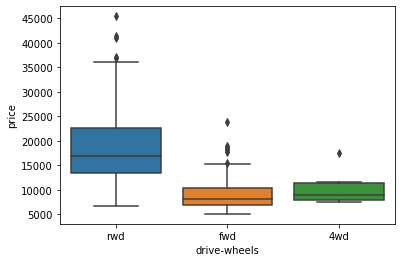

In [12]:
sns.boxplot(x="drive-wheels", y="price", data=df);

<p>Here we see that the distribution of price between the different drive-wheels categories differs; as such drive-wheels could potentially be a predictor of price.</p>


### Statistical method to checking for a significant realtionship - ANOVA

Although visualisation is helpful, it does not give us a concrete and certain vision in this (and often in others) case. So, it follows that we would want a metric to evaluate it by. For correlation between categorical and continuous variable, there are various tests. ANOVA family of tests is a common one to use.

The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. 

Do note that ANOVA is an _omnibus_ test statistic and it can't tell you what groups are the ones that have correlation among them. Only that there are at least two groups with a significant difference. 

In python, we can calculate the ANOVA statistic fairly easily using the `scipy.stats` module. The function `f_oneway()` calculates and returns: 
__F-test score__: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means. Although the degree of the 'largeneess' differs from data to data. You can use the F-table to find out the critical F-value by using the significance level and degrees of freedom for numerator and denominator and compare it with the calculated F-test score.

__P-value__:  P-value tells how statistically significant is our calculated score value.

If the variables are strongly correlated, the expectation is to have ANOVA to return a sizeable F-test score and a small p-value.

### Drive Wheels

Since ANOVA analyzes the difference between different groups of the same variable, the `groupby()` function will come in handy. With this, we can easily and concisely seperate the dataset into groups of drive-wheels. Essentially, the function allows us to split the dataset into groups and perform calculations on groups moving forward. Check out Grouping below for more explanation.

Let's see if different types 'drive-wheels' impact 'price', we group the data.

In [13]:
grouped_anova = df[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_anova.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


We can obtain the values of the method group using the method `get_group()`  

In [14]:
grouped_anova.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

Finally, we use the function `f_oneway()` to obtain the F-test score and P-value.

In [15]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_anova.get_group('fwd')['price'], grouped_anova.get_group('rwd')['price'], grouped_anova.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


From the result, we can see that we have a large F-test score and a very small p-value. Still, we need to check if all three tested groups are highly correlated?

#### Separately: fwd and rwd

In [16]:
f_val, p_val = stats.f_oneway(grouped_anova.get_group('fwd')['price'], grouped_anova.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


Seems like the result is significant and they are correlated. Let's examine the other groups

#### 4wd and rwd

In [17]:
f_val, p_val = stats.f_oneway(grouped_anova.get_group('4wd')['price'], grouped_anova.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


<h4>4wd and fwd</h4>


In [18]:
f_val, p_val = stats.f_oneway(grouped_anova.get_group('4wd')['price'], grouped_anova.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


## Descriptive Statistical Analysis

Although the insights gained above are significant, it's clear we need more work. 

Since we are exploring the data, performing some common and useful descriptive statistical analysis would be nice. However, there are a lot of them and would require a lot of work to do them by scratch. Fortunately, `pandas` library has a neat method that computes all of them for us.

The `describe()` method, when invoked on a dataframe automatically computes basic statistics for all continuous variables. Do note that any NaN values are automatically skipped in these statistics. By default, it will show stats for numerical data.

Here's what it will show:
* Count of that variable
* Mean
* Standard Deviation (std) 
* Minimum Value
* IQR (Interquartile Range: 25%, 50% and 75%)
* Maximum Value

If you want, you can change the percentiles too. Check out the docs for that. 

Here's how to do it in our dataframe:

In [19]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


To get the information about categorical variables, we need to specifically tell it to pandas to include them. 

For categorical variables, it shows:
* Count
* Unique values
* The most common value or 'top'
* Frequency of the 'top'

In [20]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


### Value Counts

Sometimes, we need to understand the distribution of the categorical data. This could mean understanding how many units of each characteristic/variable we have. `value_counts()` is a method in pandas that can help with it. If we use it with a series, it will give us the unique values and how many of them exist.

_Caution:_ Using it with DataFrame works like count of unique rows by combination of all columns (like in SQL). This may or may not be what you want. For example, using it with drive-wheels and engine-location would give you the number of rows with unique pair of values. 

Here's an example of doing it with the drive-wheels column.

In [21]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


`.to_frame()` method is added to make it into a dataframe, hence making it look better.

You can play around and rename the column and index name if you want. 

We can repeat the above process for the variable 'engine-location'.

In [22]:
df['engine-location'].value_counts().to_frame()

,engine-location
front,198
rear,3


Examining the value counts of the engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, this result is skewed. Thus, we are not able to draw any conclusions about the engine location.

## Grouping

Grouping is a useful technique to explore the data. With grouping, we can split data and apply various transforms. For example, we can find out the mean of different body styles. This would help us to have more insight into whether there's a relationsip between our target variable and the variable we are using grouping on.

Although oftenly used on categorical data, grouping can also be used with numerical data by seperating them into categories. For example we might seperate car by prices into affordable and luxury groups.

In pandas, we can use the `groupby()` method. 

Let's try it with the 'drive-wheels' variable. First we will find out how many unique values there are. We do that by `unique()` method.

In [23]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.

In [24]:
df[['drive-wheels','body-style','price']].groupby(['drive-wheels']).mean()

,price
drive-wheels,
4wd,10241.000000
fwd,9244.779661
rwd,19757.613333


From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

It's also possible to group with multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combinations 'drive-wheels' and 'body-style'.

Let's store it in the variable `grouped_by_wheels_and_body`.

In [25]:
grouped_by_wheels_and_body = df[['drive-wheels','body-style','price']].groupby(['drive-wheels','body-style']).mean()
grouped_by_wheels_and_body

price
drive-wheels body-style               
4wd          hatchback     7603.000000
             sedan        12647.333333
             wagon         9095.750000
fwd          convertible  11595.000000
             hardtop       8249.000000
             hatchback     8396.387755
             sedan         9811.800000
             wagon         9997.333333
rwd          convertible  23949.600000
             hardtop      24202.714286
             hatchback    14337.777778
             sedan        21711.833333
             wagon        16994.222222

Although incredibly useful, it's a little hard to read. It's better to convert it to a pivot table.

A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. There are various ways to do so. A way to do that is to use the method `pivot()`. However, with groups like the one above (multi-index), one can simply call the `unstack()` method.  

In [26]:
grouped_by_wheels_and_body = grouped_by_wheels_and_body.unstack()
grouped_by_wheels_and_body

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Often, we won't have data for some of the pivot cells. Often, it's filled with the value 0, but any other value could potentially be used as well. This could be mean or some other flag.

In [27]:
grouped_by_wheels_and_body.fillna(0)

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Let's do the same for body-style only

In [28]:
df[['price', 'body-style']].groupby('body-style').mean()

,price
body-style,
convertible,21890.500000
hardtop,22208.500000
hatchback,9957.441176
sedan,14459.755319
wagon,12371.960000


### Visualizing Groups

Heatmaps are a great way to visualize groups. They can show relationships clearly in this case. 

Do note that you need to be careful with the color schemes. Since chosing appropriate colorscheme is not only appropriate for your 'story' of the data, it is also important since it can impact the perception of the data. 

[This resource](https://matplotlib.org/tutorials/colors/colormaps.html) gives a great idea on what to choose as a color scheme and when it's appropriate. It also has samples of the scheme below too for a quick preview along with when should one use them.

Here's an example of using it with the pivot table we created with the `seaborn` package.

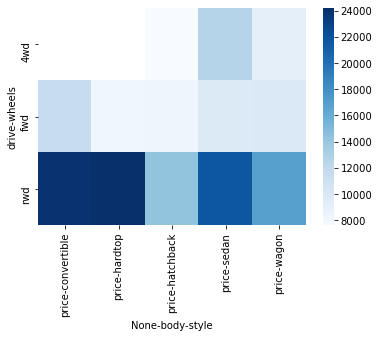

In [29]:
sns.heatmap(grouped_by_wheels_and_body, cmap="Blues");

This heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' in the vertical and horizontal axis respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.

## Correlation and Causation

Correlation and causation are terms that are used often and confused with each other--or worst considered to imply the other. Here's a quick overview of them: 

__Correlation__: The degree of association (or resemblance) of variables with each other.

__Causation__: A relationship of cause and effect between variables.

It is important to know the difference between these two.

Note that correlation does __not__ imply causation. 

Determining correlation is much simpler. We can almost always use methods such as Pearson Correlation and graphs. Determining causation may require independent experimentation.

### Pearson Correlation

Described earlier, Pearson Correlation is great way to measure linear dependence between two variables. It's also the default method in the method corr.


In [30]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


However, just knowing it is not enough. We also need to know whether the relationship is statistically significant or not. We can use p-value for that.

### P-value

In very simple terms, p-value checks the probability whether the result we have could be just a random chance. For example, for a p-value of 0.05, we are certain that our results are insignificant about 5% of time and are significant 95% of the time.

It's recommended to define a tolerance level of the p-value beforehand. Here's some common interpretations of p-value:

* The p-value is $<$ 0.001: A strong evidence that the correlation is significant.
* The p-value is $<$ 0.05: A moderate evidence that the correlation is significant.
* The p-value is $<$ 0.1: A weak evidence that the correlation is significant.
* The p-value is $>$ 0.1: No evidence that the correlation is significant.

We can obtain this information using  `stats` module in the `scipy` library.

Let's calculate it for wheel-base vs price

In [31]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732989e-20


Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)

Let's try one more example: horsepower vs price.

In [32]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.809574567003656  with a P-value of P =  6.369057428259557e-48


Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).


### Conclusion: Important Variables

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. Some more analysis later, we can find that the important variables are: 

Continuous numerical variables:
* Length
* Width
* Curb-weight
* Engine-size
* Horsepower
* City-mpg
* Highway-mpg
* Wheel-base
* Bore
    
Categorical variables:
* Drive-wheels

If needed, we can now mone onto into building machine learning models as we now know what to feed our model.

P.S. [This medium article](https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365#:~:text=A%20simple%20approach%20could%20be,variance%20of%20the%20continuous%20variable.&text=If%20the%20variables%20have%20no,similar%20to%20the%20original%20variance) is a great resource that talks about various ways of correlation between categorical and continous variables. 

## Author
By Abhinav Garg